## 0. Import libraries

### Standard Libraries

In [ ]:
# STANDARD LIBRARIES
# System and file management
import sys
import os
from tqdm import tqdm
#  import shutil # functions of high-level operations on files and collections of files
import glob  # functions to organize files under a specified folder

# Drive
from google.colab import drive
from google.colab import files

# Images
import cv2 # opencv-free library for artificial vision
import PIL # python imaging library
from PIL import Image 

# Pandas and Numpy
import pandas as pd
import numpy as np
from numpy import savetxt
import random
import regex as re

# Visualization tools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
# TensorFlow
import tensorflow as tf

# Keras
from keras.models import Model, load_model, save_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Flatten
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.optimizers import Adam, SGD, Adagrad

In [ ]:
# tf.test.gpu_device_name()

In [ ]:
# Scikit-learn

# Engineering
from sklearn.model_selection import learning_curve

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Activate Drive

In [ ]:
# Mount google drive in google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Custom libraries (Python)

In [ ]:
sys.path.insert(0,'/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/notebooks/modules')

In [ ]:
# Availables python functions 
!ls '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/notebooks/modules'

classification.py    image_viz.py	     __pycache__
eda.py		     old		     test.py
files_management.py  performance_checker.py  unet.py


In [ ]:
# CUSTOM LIBRARIES

# File management
import files_management as fm

# Vizualizations
import image_viz as iv
import eda

# U-Net
import unet
# Classification
import classification as cls

# Testing
import performance_checker as pc
import test as t

## 1.Paths

### General

In [ ]:
# Drive paths
GEN_DRIVE = '/content/drive'
DRIVE = '/My Drive' 
PROJECT = '/IRONHACK/PROJECTS/CNN-Leukemia'
  
# Folder containing the original data.
INPUT = '/input'

# Folder containing the notebooks.
NB = '/notebooks'
# Functions
FUNCTION = GEN_DRIVE+DRIVE+PROJECT+NB+'/modules'  

# Folder containing the outputs (arrays/csv/viz/models).
OUTPUT = '/output/'
SUBFOLDER = ['arrays/','models/','viz/']
# Arrays
DEST = ['128x128','450x450','validation']

# Training images
# Images are stored in three different folders (fold_0, fold_1, fold_2)
TRAIN = '/training_data/'
FOLDERS = ['fold_0','fold_1','fold_2']
# Diseasedd Cells (ALL)/ Non-Diseased Cells (HEM)
CELLS = ['all', 'hem']

# Valudation data
VALIDATION = '/validation_data/C-NMC_test_prelim_phase_data'

# Testing images
TEST = 'testing_data/C-NMC_test_final_phase_data'
REAL = 'testing_data/C-NMC_real_data'

In [ ]:
# INPUT folder
path_input = GEN_DRIVE+DRIVE+PROJECT+INPUT

# Validation
path_val = path_input+VALIDATION

# Test path
path_test = path_input+'/'+TEST+'/*.bmp'
path_real = path_input+'/'+REAL+'/*.JPG'

In [ ]:
# Export paths
# Arrays path
arrays_path = GEN_DRIVE+DRIVE+PROJECT+OUTPUT+SUBFOLDER[0]
# Models
path_model = GEN_DRIVE+DRIVE+PROJECT+OUTPUT+SUBFOLDER[1]
# Viz path
path_viz = GEN_DRIVE+DRIVE+PROJECT+OUTPUT+SUBFOLDER[2]

## 2. Loading Data

### 2.1 Training Data

Let's load the module: **files_management** as **fm**

Labelling data:

  - **ALL** (Leukemia cells): **1**
  - **HEM** (Healty cells): **0**

In [ ]:
# Training Set
# Images
images=['fold_0_all_images','fold_0_hem_images','fold_1_all_images','fold_1_hem_images','fold_2_all_images','fold_2_hem_images']
#Labels
labels=['fold_0_all_labels','fold_0_hem_labels','fold_1_all_labels','fold_1_hem_labels','fold_2_all_labels','fold_2_hem_labels']

In [ ]:
training_data = []

for i,l in zip(images,labels):
  # print(i,l)
  training_data.append(fm.load_data(arrays_path+DEST[0]+'/', i, l, '.npy'))

In [ ]:
X_train=[]
y_train=[]

for ind, (i,l) in enumerate(zip(images,labels)):
  # print(ind)

  training_data=fm.load_data(arrays_path+DEST[0]+'/', i, l, '.npy')

  X_train.extend(training_data[0])
  y_train.extend(training_data[1])

X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
print(f'Training Set: {y_train.shape[0]} images')

Training Set: 10661 images


### 2.2 Validation Data

In [ ]:
# Validation Data (450x450)
val_images='val_128_images'

In [ ]:
# Images
val = fm.load_data(arrays_path+DEST[2]+'/', val_images, 0,'.npy')

In [ ]:
# Labels
# DF with labels
validation_df = pd.read_csv(path_val+'_labels.csv')
# validation_df.head(2)

In [ ]:
X_val = val

In [ ]:
# DF with labels
validation_df = pd.read_csv(path_val+'_labels.csv')
validation_df.head(2)

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1


In [ ]:
y_val = (validation_df.labels).to_numpy()

## 3. Loading Model

In [ ]:
# Availables models 
!ls '/content/drive/My Drive/IRONHACK/PROJECTS/CNN-Leukemia/output/models'

ANNa01_Model.h5  ANNa_Model.h5	mini_ANNa_Model.h5
ANNa02_Model.h5  checkpoints	OLD


In [ ]:
# Model names
name = 'ANNa_Model.h5'

In [ ]:
f1=unet.get_f1

In [ ]:
loss = 'binary_crossentropy'
opt = ['Adam', SGD(lr=0.001, momentum=0.9, decay=0.01)] # Adam/Stochastic Gradient Descent
metric = ['acc',f1,'AUC'] # AUC tells how much model is capable of distinguishing between classes.

In [ ]:
loaded_model = load_model(path_model+name,
                          custom_objects=None,
                          compile=False)

In [ ]:
loaded_model.compile(loss=loss, optimizer=opt[0], metrics=metric)

In [ ]:
loaded_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 4)  112         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 4)  148         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 4)    0           conv2d_1[0][0]                   
_______________________________________________________________________________________

## 3. Test

In [ ]:
# Variables
epochs = 20
batch = 32

### Evaluation

In [ ]:
# Model Evaluation
tr_score = loaded_model.evaluate(X_train, y_train, batch_size=batch, verbose=1) 

334/334 [==============================] - 183s 548ms/step - loss: 0.4283 - acc: 0.8146 - get_f1: 0.6280 - auc: 0.8544


In [ ]:
print('Train Loss:', str(round(tr_score[0]*100,2))+'%') 
print('Train Accuracy:', str(round(tr_score[1]*100,2))+'%')
print('Train f1_score:', str(round(tr_score[2]*100,2))+'%')

Train Loss: 42.83%
Train Accuracy: 81.46%
Train f1_score: 62.8%


In [ ]:
# Model Evaluation
val_score = loaded_model.evaluate(X_val, y_val, batch_size=batch, verbose=1) 

59/59 [==============================] - 31s 528ms/step - loss: 0.7772 - acc: 0.5972 - get_f1: 0.7211 - auc: 0.4924


In [ ]:
print('Val Loss:', str(round(val_score[0]*100,2))+'%') 
print('Val Accuracy:', str(round(val_score[1]*100,2))+'%')
print('Val f1_score:', str(round(val_score[2]*100,2))+'%')

Val Loss: 77.72%
Val Accuracy: 59.72%
Val f1_score: 72.11%


### Prediction

The model is used to generate predictions over the test subset in order to obtain performance metrics.

In [ ]:
y_pred=loaded_model.predict(X_val, batch_size=batch, verbose=1)

59/59 [==============================] - 31s 527ms/step


In [ ]:
y_pred=np.array([0 if y<0.5 else 1 for y in y_pred])

### Performance Charts

Let's load the module: **metrics** as **m** 

In [ ]:
# Constants 
col = 'PuRd'
xticks = ['N','P']
yticks = ['N','P']

Model Evaluation Metrics:

- **Accuracy** shows us how comfortable the model is with detecting the positive and negative class.
- **Precision** tells us about the success probability of making a correct positive class classification.
- **Recall** explains how sensitive the model is towards identifying the positive class.
- **F1-score** seeks a balance between precision and recall.

**Sensitivity** and **specificity** are statistical measures of the performance of a binary classification test that are widely used in **medicine**:

- **Sensitivity** measures the proportion of true positives that are correctly identified (e.g., the proportion of those who truly have a condition (affected) who are correctly identified as having some condition).
- **Specificity** measures the proportion of true negatives (e.g. the proportion of those who truly do not have the condition (unaffected) who are correctly identified as not having the condition).

#### Classification Report

In [ ]:
cr = classification_report(y_val, y_pred,target_names=['N','P'])

print(f'Classification Report')
print(cr)

Classification Report
              precision    recall  f1-score   support

           N       0.35      0.18      0.24       648
           P       0.65      0.82      0.73      1219

    accuracy                           0.60      1867
   macro avg       0.50      0.50      0.48      1867
weighted avg       0.55      0.60      0.56      1867



In [ ]:
acc = round(accuracy_score(y_val, y_pred)*100,2)
print('Accuracy: '+ str(acc)+'%') 

Accuracy: 59.72%


In [ ]:
er = (100 - acc)
print('Error Rate: '+ str(er)+'%')

Error Rate: 40.28%


#### Confusion Matrix

In [ ]:
# y_val=y_val.reshape((len(y_val),1))
# y_val.shape

In [ ]:
# validation_df[:705].labels.value_counts()

In [ ]:
# y_pred.value_counts()

- Positive class: patients with disease-ALL
- Negative class: patients with no disease-HEM

Confusion Matrix
---------------------------------------------
TN: 118 (18.21%)
FN: 222 (18.21%)
TP: 997 (81.79%)
FP: 530 (81.79%)


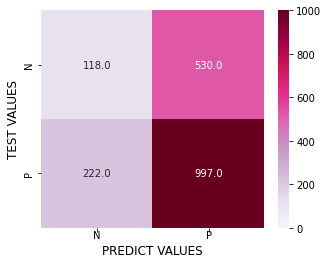

In [ ]:
cm=pc.confusion_mtx(y_val, y_pred, col, xticks, yticks)

In [ ]:
# Save Confusion Matrix
# plt.savefig(path_viz+'ANNa_cm.jpg')

#### ROC curve

**AUC-ROC curve** is a performance measurement for classification problem. It tells **how much model is capable of distinguishing between classes**.

#### Terms used in AUC and ROC curves

**TPR (True Positive Rate)-Recall-Sensitivity**


$$TPR-Sensitivity = \frac{TP}{TP+FN}$$


**Specificity**


$$Specificity = \frac{TN}{TN+FP}$$

**FPR (False Positive Rate)**


$$FPR = 1-Specificity$$

In [ ]:
# TPR - True Positive Rate
sens = round(cm[0]*100,2)

# Sensitivity: proportion of true positives that are correctly identified
print('TPR-Sensitivity: '+ str(sens)+'%')

TPR-Sensitivity: 81.79%


In [ ]:
spec = round(cm[1]*100,2)

# Specificity: proportion of true negatives that are correctly identified
print('Specificity: '+ str(spec)+'%')

Specificity: 18.21%


In [ ]:
# FPR - False Positive Rate (Fall Out --> Probability of false allert)
fpr =100 - spec
print('FPR: '+ str(fpr)+'%')

FPR: 81.78999999999999%


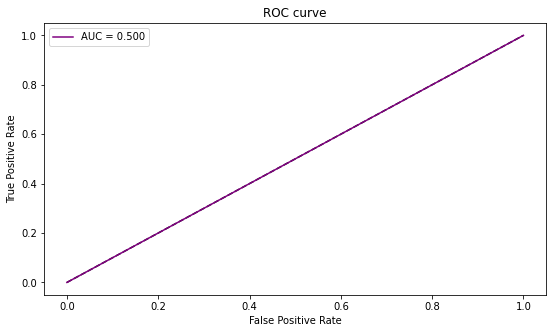

In [ ]:
pc.show_roc_curve (y_val, y_pred)

In [ ]:
# Save ROC Curve
# plt.savefig(path_viz+'ANNa_ROCcurve.png')

## 4. Visualization of the Results

We choose **3 random images of cells** from the **Validation Set** and see what our model is able to predict.

In [ ]:
# Number of shuffle images
n=3

In [ ]:
shuffle_selector = t.test_shuffle_selector(X_val,y_val,n,128)

In [ ]:
# Shuffle images
imgs= shuffle_selector[0]

In [ ]:
# Shuffle resized images
res_imgs= shuffle_selector[1]

In [ ]:
# Labels
lbls= shuffle_selector[2]

### Prediction

In [ ]:
pred = [0 if y<0.5 else 1 for y in loaded_model.predict(res_imgs)]
# pred

### Visualization

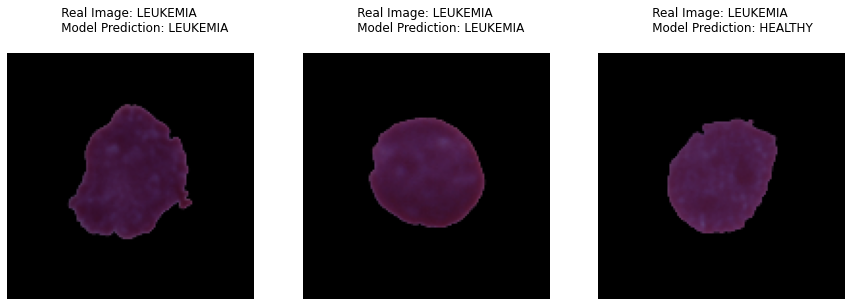

In [ ]:
t.prediction(n,imgs,lbls,pred)

## 5. Conclusions

We have been able to build a model that accurately classifies both healthy and Leukemia cells.

Althought the model slightly overfits (train-acc: ... , val-acc: ..., test-acc: ...) we believe that if the model performs well this difference is affordable.

The main setback is that the model overfits (train-acc: 94.6, val-acc: 87.61, test-acc: 88.7). We have tried to avoid overfitting by tuning the dropout layers, and have minimized it to the extent of our knowledge. You can check model performance in real life in the following notebook.



#### Variables

In [ ]:
# Variables
lim_acc = 65
# TPR-True Positive Rate
lim_tpr = 65
# FPR-False Positive Rate
lim_fpr = 65

In [ ]:
pc.recap(acc,er,sens,fpr,lim_acc, lim_tpr, lim_fpr)

RECAP
------------------------------------------------------------------------------------------------------------------------------------------------------
ACCURACY
In our model, the Accuracy is 59.72% and the Error Rate is 40.28%, so the model can NOT correctly label a high percentage of the instances.
 
TPR_SENSITIVITY
The Sensitivity-TPR_True Positive Rate is 81.79%, which means that the model has a good capacity to detect the POSITIVE instances.
 
FPR_FALL OUT
Finally, the FPR_False Positive Rate is 81.78999999999999%, which shows that the model NOT correctly labels most of the NEGATIVE instances.
